ΕΡΓΑΣΙΑ 1 - ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ
ΟΜΑΔΑ:
ΕΥΑΓΓΕΛΟΣ ΦΑΚΟΡΕΛΛΗΣ: 1115201900203
ΧΡΗΣΤΟΣ ΓΕΩΡΓΙΟΣ ΦΟΥΚΑΝΕΛΗΣ: 1115201900204

PYTHON LIBRARIES - IMPORTS

In [25]:
import pickle
import re
import nltk
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
cachedStopWords = stopwords.words("english") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aggel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aggel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ΜΕΡΟΣ 1 - ΠΡΟΕΠΕΞΕΡΓΑΣΙΑ ΚΑΙ ΚΑΘΑΡΙΣΜΑ ΤΩΝ ΔΕΔΟΜΕΝΩΝ
Για την υλοποίηση του 1ου μέρους της εργασίας έχουν υλοποιηθεί βοηθητικές συναρτήσεις, τις οποίες εφαρμόζουμε στην στήλη "text" που περιέχει τα tweets, στο dataframe με τα δεδομένα που δημιουργήθηκε από το .pkl αρχείο

In [2]:
def remove_links(x):
    return re.sub(r"http\S+", "", x)

def remove_punctuation(x):
    return re.sub(r'[^\w\s]', '', x)

def lowercase(x):
    return x.lower()

def remove_stopwords(x):
    return ' '.join([word for word in x.split() if word not in cachedStopWords])

Διαβάζουμε τα δεδομένα από το .pkl αρχείο χρησιμοποιώντας την pickle βιβλιοθήκη και μετατρέπονται σε pandas Dataframe, όπου στη συνέχεια εφαρμόζουμε τις βοηθητικές συναρτήσεις για το "καθάρισμα" των δεδομένων.

In [3]:
file = open('eclass_all_with_sentiment_v2.pkl', 'rb')
data = pickle.load(file)

data['text'] = data['text'].apply(remove_links)
data['text'] = data['text'].apply(lowercase)
data['text'] = data['text'].apply(remove_punctuation)
data['text'] = data['text'].apply(remove_stopwords)

file.close()

ΜΕΡΟΣ 2 - ΑΝΑΛΥΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

i. Κατανομή των συναισθημάτων σε positive,negative και neutral στο σύνολο των δεδομένων

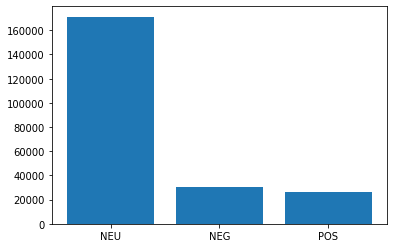

In [4]:
selected_sentiments=['NEU','POS','NEG']

sentiment_distribution = data.loc[data['sentiment'].isin(selected_sentiments),'sentiment'].value_counts()
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.show()

ii. Ακολουθεί διάγραμμα με τις 10 πιο συνηθισμένες λέξεις στο σύνολο των δεδομένων

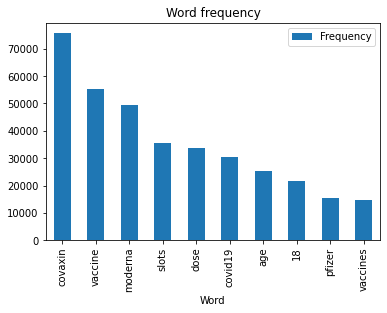

In [5]:
word_count_all = Counter(" ".join(data['text']).split()).most_common(10)
word_frequency_all = pd.DataFrame(word_count_all, columns = ['Word', 'Frequency'])

word_frequency_all.plot(x='Word',y='Frequency',kind='bar')
plt.title("Word frequency")
plt.show()

iii. Ακολουθεί διάγραμμα με τις 10 πιο συνηθισμένες λέξεις στα θετικά tweets

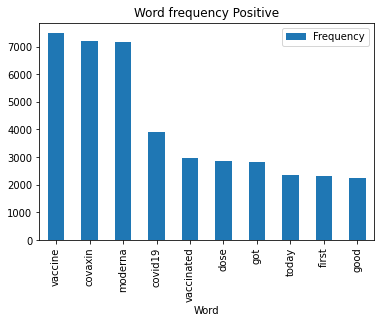

In [6]:
positive_subset_data = data[data['sentiment'] == 'POS']
word_count_positive = Counter(" ".join(positive_subset_data['text']).split()).most_common(10)
word_frequency_positive = pd.DataFrame(word_count_positive, columns = ['Word', 'Frequency'])
word_frequency_positive.plot(x='Word',y='Frequency',kind='bar')
plt.title("Word frequency Positive")
plt.show()

iii. Ακολουθεί διάγραμμα με τις 10 πιο συνηθισμένες λέξεις στα αρνητικά tweets

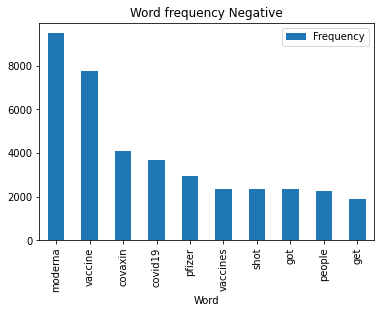

In [7]:
negative_subset_data = data[data['sentiment'] == 'NEG']
word_count_negative = Counter(" ".join(negative_subset_data['text']).split()).most_common(10)
word_frequency_negative = pd.DataFrame(word_count_negative, columns = ['Word', 'Frequency'])
word_frequency_negative.plot(x='Word',y='Frequency',kind='bar')
plt.title("Word frequency Negative")
plt.show()

iii. Ακολουθεί διάγραμμα με τις 10 πιο συνηθισμένες λέξεις στα ουδέτερα tweets

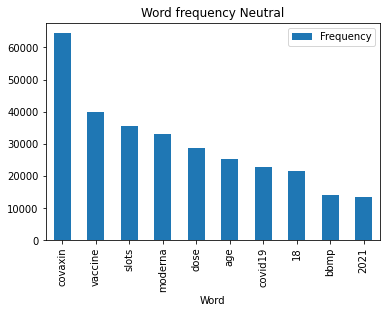

In [8]:
neutral_subset_data = data[data['sentiment'] == 'NEU']
word_count_neutral = Counter(" ".join(neutral_subset_data['text']).split()).most_common(10)
word_frequency_neutral = pd.DataFrame(word_count_neutral, columns = ['Word', 'Frequency'])
word_frequency_neutral.plot(x='Word',y='Frequency',kind='bar')
plt.title("Word frequency Neutral")
plt.show()

iv. Σύγκριση ως προς το συναίσθημα των tweets που περιέχουν την λέξη 'astrazeneca' με εκείνα που περιέχουν τις λέξεις 'moderna' και 'pfizer' ή 'biontech'

In [11]:
astraz = data[data['text'].str.contains("astrazeneca")]
other = data[data['text'].str.contains("moderna") & (data['text'].str.contains("pfizer") | data['text'].str.contains("biontech"))]

mean1 = astraz['sentiment'].value_counts().idxmax()
mean2 = other['sentiment'].value_counts().idxmax()

mean1,mean2

('NEU', 'NEU')

Παρατηρούμε πως και στις 2 περιπτώσεις το συναίσθημα είναι το ίδιο και συγκεκριμένα ουδέτερο.

v. Με βάση την στήλη "date" παρουσιάζεται το πλήθος των tweets ανά μήνα, σε κάθε έτος (2020 και 2021)

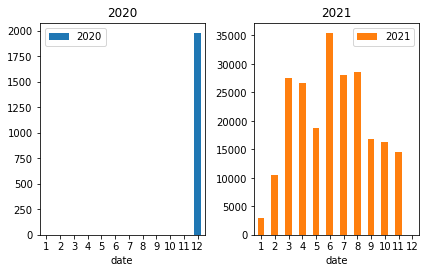

In [9]:
data['date']= pd.to_datetime(data['date'])

tweets_by_date = data['date'].groupby([data.date.dt.year, data.date.dt.month]).agg('count')
ax = tweets_by_date.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.tight_layout()
plt.show()

Τον 6ο μήνα (Ιούνιο) του 2021 με αναφορά στην ειδησεογραφία, επικρατούσε η μετάλλαξη Δέλτα του Covid19.
Πηγή: https://edition.cnn.com/us/live-news/coronavirus-pandemic-vaccine-updates-06-25-21/index.html

Τον 8ο μήνα (Αύγουστο) του 2021 με αναφορά στην ειδησεογραφία, ανακοινώθηκαν υποχρεωτικοί εμβολιασμοί και ήταν η περίοδος που πολύς κόσμος εμβολιάστηκε. 
Πηγή: https://edition.cnn.com/us/live-news/coronavirus-pandemic-vaccine-updates-08-24-21/index.html

vi. Μία πρώτη παρατήρηση που προκύπτει από τα δεδομένα είναι πως τα tweets που αναφέρονται στο "Lockdown" έχουν κατά κύριο λόγο αρνητικό συναίσθημα

In [12]:
lockdown = data[data['text'].str.contains("lockdown")]
lockdown_feeling = lockdown['sentiment'].value_counts().idxmax()
lockdown_feeling

'NEG'

vi. Μία δεύτερη παρατήρηση που προκύπτει από τα δεδομένα είναι η εξής:
    Παρόλο που στις παραπάνω παρατηρήσεις μελετήσαμε χωριστά τα υποσύνολα των tweets που περιέχουν τις λέξεις astrazeneca και moderna και pfizer ή biontech και είδαμε πως το συναίσθημα που επικρατεί και στις 2 περιπτώσεις είναι ουδέτερο, αξίζει να παρατηρήσουμε ότι στα tweets που περιέχουν την έννοια του εμβολιασμού (vaccination) γενικότερα, το συναίσθημα που επικρατεί είναι αρνητικό.

In [14]:
vaccinations = data[data['text'].str.contains("vaccination")]
vaccinations_feeling = lockdown['sentiment'].value_counts().idxmax()
vaccinations_feeling

'NEG'

ΜΕΡΟΣ 3 VECTORIZATION - ΕΞΑΓΩΓΗ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ

Αρχικά χωρίζουμε τα δεδομένα. Παίρνουμε το 10% του συνόλου των αρχικών δεδομένων.

In [17]:
from sklearn.model_selection import train_test_split

use_data = data.iloc[:22000,:]

model_data = use_data.values
#expected input (text column) and expected outpout (sentiment)
input, expected_output = model_data[:, 10], model_data[:, -1]

# train and test split
input_train, input_test, output_train, output_test = train_test_split(input, expected_output, test_size=0.20, random_state=1)

Ακολουθεί ο αλγόριθμος Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_train = vectorizer.fit_transform(input_train)
bow_test = vectorizer.transform(input_test)

# file save
output = open('bagwords.pkl', 'wb')
pickle.dump(bow_train, output)
output.close()

#load from file if needed
#file = open('bagwords.pkl', 'rb')
#test = pickle.load(file)

Ακολουθεί ο αλγόριθμος Tf-idf

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
idf_train = v.fit_transform(input_train)
idf_test = v.transform(input_test)

output = open('tfidf.pkl', 'wb')
pickle.dump(idf_train, output)
output.close()

#load from file if needed
#file = open('tfidf.pkl', 'rb')
#test = pickle.load(file)

Ακολουθεί ο αλγόριθμος Word Embeddings

In [26]:
from gensim.models import Word2Vec

df_X_train = pd.DataFrame(input_train, columns=['text'])
tokenized_tweet_train = df_X_train['text'].apply(lambda idf_train: idf_train.split()) 

df_X_test = pd.DataFrame(input_test, columns=['text'])
tokenized_tweet_test = df_X_test['text'].apply(lambda idf_train: idf_train.split())  


model_w2v = Word2Vec(
                tokenized_tweet_train,
                vector_size=200, # desired no. of features/independent variables
                window=5, # context window size
                min_count=1,
                sg = 1, # 1 for skip-gram model
                hs = 0,
                negative = 10, # for negative sampling
                workers= 3, # no.of cores
                seed = 34)

model_w2v_test = Word2Vec(
                tokenized_tweet_test,
                vector_size=200, # desired no. of features/independent variables
                window=5, # context window size
                min_count=1,
                sg = 1, # 1 for skip-gram model
                hs = 0,
                negative = 10, # for negative sampling
                workers= 3, # no.of cores
                seed = 34)
model_w2v.train(tokenized_tweet_train, total_examples = len(df_X_train), epochs=20)
model_w2v_test.train(tokenized_tweet_test, total_examples = len(df_X_test), epochs=20)

# model_w2v.save('saved_model')
#retrieved_model = Word2Vec.load('saved_model')

tweet_list_train = []
tweet_list_test = []

# from word vector to tweet vector

for tweet in input_train:
    
    word_tokens = tweet.split()
    sum = model_w2v.wv[word_tokens[0]]
    
    for count,token in enumerate(word_tokens,start=1):
        sum = np.add(sum,model_w2v.wv[token])
        
    avg = np.true_divide(sum,len(word_tokens))    
    tweet_list_train.append(avg)  

for tweet in input_test:
    
    word_tokens = tweet.split()
    sum = model_w2v_test.wv[word_tokens[0]]
    
    for count,token in enumerate(word_tokens,start=1):
        sum = np.add(sum,model_w2v_test.wv[token])
        
    avg = np.true_divide(sum,len(word_tokens))    
    tweet_list_test.append(avg)

ΜΕΡΟΣ 4 - ΔΟΚΙΜΗ ΤΑΞΙΝΟΜΗΤΩΝ (SVM, KNN, Random Forests)

SVM ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD BAG OF WORDS

In [27]:
from sklearn import svm

#classifier selection
clf = svm.SVC()

#model train
clf.fit(bow_train, output_train)

svm.SVC()

#prediction
clf.predict(bow_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

SVM ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD TF-IDF

In [29]:
#classifier selection
clf = svm.SVC()

#model train
clf.fit(idf_train, output_train)

svm.SVC()

#prediction
clf.predict(idf_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

SVM ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD WORD EMBEDDINGS

In [ ]:
#classifier selection
clf = svm.SVC()

#model train
clf.fit(tweet_list_train, output_train)

svm.SVC()

#prediction
clf.predict(tweet_list_test)

RANDOM FORESTS ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD BAG OF WORDS

In [31]:
from sklearn.ensemble import RandomForestClassifier

#classifier selection
clf = RandomForestClassifier()

# model train
clf.fit(bow_train, output_train)

# prediction
clf.predict(bow_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

RANDOM FORESTS ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD TF-IDF

In [32]:
#classifier selection
clf = RandomForestClassifier()

# model train
clf.fit(idf_train, output_train)

# prediction
clf.predict(idf_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

RANDOM FORESTS ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD WORD EMBEDDINGS

In [33]:
#classifier selection
clf = RandomForestClassifier()

# model train
clf.fit(tweet_list_train, output_train)

# prediction
clf.predict(tweet_list_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

KNN ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD BAG OF WORDS

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#classifier selection
clf = KNeighborsClassifier(n_neighbors=3)

# model train
clf.fit(bow_train, output_train)

# prediction
clf.predict(bow_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

KNN ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD TF-IDF

In [35]:
#classifier selection
clf = KNeighborsClassifier(n_neighbors=3)

# model train
clf.fit(idf_train, output_train)

# prediction
clf.predict(idf_test)

array(['NEU', 'NEU', 'NEU', ..., 'NEU', 'NEU', 'NEU'], dtype=object)

KNN ΤΑΞΙΝΟΜΗΤΗΣ ΜΕ VECTORIZATION METHOD WORD EMBEDDINGS

In [36]:
#classifier selection
clf = KNeighborsClassifier(n_neighbors=3)

# model train
clf.fit(tweet_list_train, output_train)

# prediction
clf.predict(tweet_list_test)

array(['NEG', 'POS', 'NEG', ..., 'POS', 'NEG', 'NEU'], dtype=object)